In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data 

## Exercise

### 1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?

#### A: one sample, one sample t-test, 
- Are adults who drink milk taller than adults who dont drink milk?

#### A: two sample one tail 
- Is the the price of gas higher in texas or in new mexico?

#### A:  two sample one tail 
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
#### A: k sample? two tail independent t-test

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [3]:
a = 0.05

H$_0$ : Average time it takes to sell homes is not different for two offices

H$_a$ : Average time it takes to sell homes is different for two offices

In [11]:
p_value = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50)[1]

In [15]:
p_value  < a

True

### 3. Load the mpg dataset and use it to answer the following questions:
- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [13]:
mpg = data('mpg')

In [32]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel_econ
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


H$_0$ : There is no difference in fuel-efficiency in cars from 2008 vrs 1999

H$_a$ : There is a difference in fuel-efficiency in cars from 2008 vrs 1999

In [30]:
mpg["avg_fuel_econ"] = (mpg['cty'] + mpg['hwy']) / 2

In [34]:
old_cars = mpg[mpg.year == 1999].avg_fuel_econ
new_cars = mpg[mpg.year != 1999].avg_fuel_econ

In [39]:
_, levene_p = stats.levene( new_cars, old_cars)

In [38]:
levene_p < a

False

In [41]:
t_stat, p_val = stats.ttest_ind(old_cars, new_cars, equal_var=True)

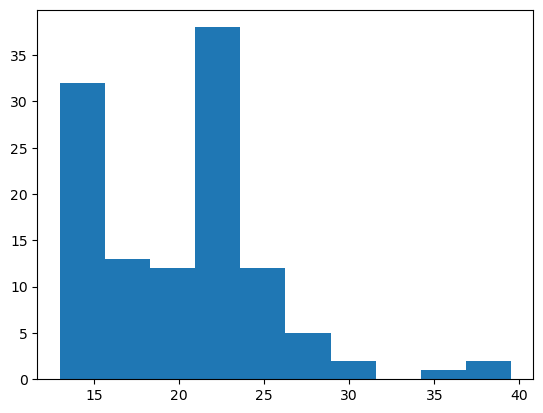

In [43]:
plt.hist(old_cars);

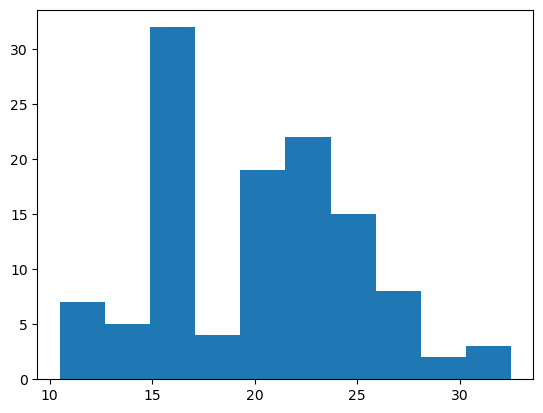

In [45]:
plt.hist(new_cars);

In [61]:
p_val < a
t_stat

0.21960177245940962

### Are compact cars more fuel-efficient than the average car?

In [48]:
mpg["is_compact"] = mpg["class"].str.startswith("compact")

In [50]:
compact = mpg[mpg.is_compact == True].avg_fuel_econ
not_compact = mpg[mpg.is_compact != True].avg_fuel_econ

H$_0$ : There is no difference in fuel-efficiency in compact cars vrs non compact cars

H$_a$ : There is a difference in fuel-efficiency in compact cars vrs non compact cars

In [55]:
_, levene_p = stats.levene( new_cars, old_cars)

In [56]:
levene_p < a

False

In [57]:
t_stat, p_val = stats.ttest_ind(old_cars, new_cars, equal_var=True)

In [72]:
(p_val / 2) < a

True

### Do manual cars get better gas mileage than automatic cars?

H$_0$ : There is no difference in highway mileage in auto and manual vehicle

H$_a$ : There is a difference in highway mileage in auto and manual vehicle

In [63]:
mpg["auto_transmission"] = mpg.trans.str.startswith("auto")

In [67]:
auto_hwy = mpg[mpg['auto_transmission'] == True].hwy
manual_hwy = mpg[mpg['auto_transmission'] != True].hwy

In [68]:
_, levene_p = stats.levene(auto_hwy, manual_hwy)

In [69]:
levene_p < a

False

In [70]:
t_stat, p_val = stats.ttest_ind(manual_hwy, auto_hwy, equal_var=True)

In [71]:
p_val < a

True